In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path="/content/among_us.csv"

In [ ]:
df = pd.read_csv("/content/among_us.csv")
df

,USER ID,Game Completed Date,Team,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code,Outcome
0,U1,12/13/2020 at 1:26:56 am EST,Crewmate,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF,Win
1,U1,12/13/2020 at 1:17:42 am EST,Crewmate,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF,Loss
2,U1,12/13/2020 at 12:57:47 am EST,Crewmate,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF,Win
3,U1,12/13/2020 at 12:41:55 am EST,Imposter,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF,Win
4,U1,12/13/2020 at 12:30:37 am EST,Crewmate,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,U9,NaN,NaN,-,NaN,NaN,NaN,NaN,No,NaN,-,-,Europe / DJCWJF,Loss
2223,U9,NaN,NaN,7,NaN,NaN,NaN,NaN,No,0.0,04m 09s,--,Europe / DJCWJF,Loss
2224,U9,NaN,NaN,7,NaN,NaN,NaN,NaN,No,0.0,06m 31s,++,Europe / DJCWJF,Win
2225,U9,NaN,NaN,7,NaN,NaN,NaN,NaN,No,0.0,06m 06s,--,Europe / DJCWJF,Loss


In [ ]:
df["Murdered"] = df["Murdered"].replace("Yes", "Murdered")
df["Murdered"] = df["Murdered"].replace("No", "Not Murdered")
df["Murdered"] = df["Murdered"].replace("-", "Missing")

In [ ]:
def convert_murdered(murdered):
  """Converts a murdered string to a category."""
  if murdered == "Yes":
    return "Murdered"
  elif murdered == "No":
    return "Not Murdered"
  else:
    return "Missing"

def convert_game_length(game_length):
  """Converts a game length string to an integer."""
  game_length = re.sub("m ", "", game_length)
  try:
    return int(game_length)
  except ValueError:
    return None

def convert_outcome(outcome):
  """Converts an outcome string to a category."""
  if outcome == "Win":
    return "Win"
  else:
    return "Lose"

PIE PLOT- crewmate vs imposter

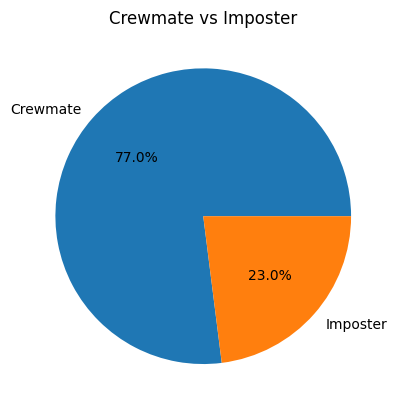

In [ ]:
plt.pie(df["Team"].value_counts(), labels=["Crewmate", "Imposter"], autopct="%1.1f%%")
plt.title("Crewmate vs Imposter")
plt.show()

DONUT PLOT - murdered, not murdered, missing

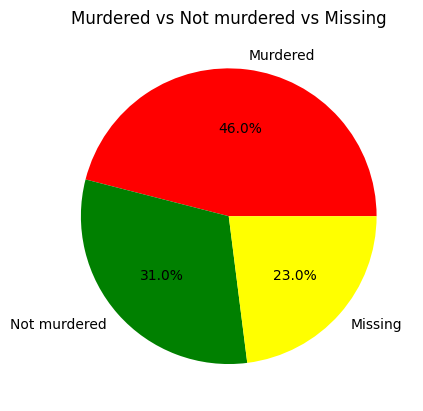

In [ ]:
plt.pie(df["Murdered"].value_counts(), labels=["Murdered", "Not murdered", "Missing"], autopct="%1.1f%%",
        colors=["red", "green", "yellow"])
plt.title("Murdered vs Not murdered vs Missing")
plt.show()


SCATTER PLOT- sabotages fixed vs gamelength

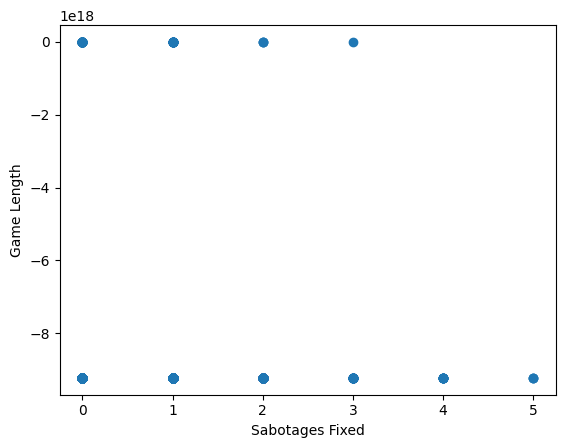

In [ ]:
df["Game Length"] = df["Game Length"].apply(pd.to_timedelta)
df["Game Length"] = df["Game Length"].astype(int)
plt.scatter(df["Sabotages Fixed"], df["Game Length"])
plt.xlabel("Sabotages Fixed")
plt.ylabel("Game Length")
plt.show()

HISTOGRAM- Gamelength vs team

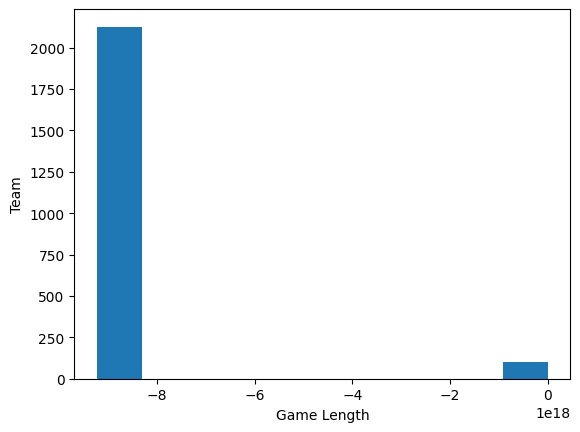

In [ ]:
plt.hist(df["Game Length"])
plt.xlabel("Game Length")
plt.ylabel("Team")
plt.show()

BARPLOT- No of tasks completed vs count of crewmates

<ipython-input-11-64305f6a577b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Name": "Crewmate", "Game Length": 10, "All Tasks Completed": 5}, ignore_index=True)


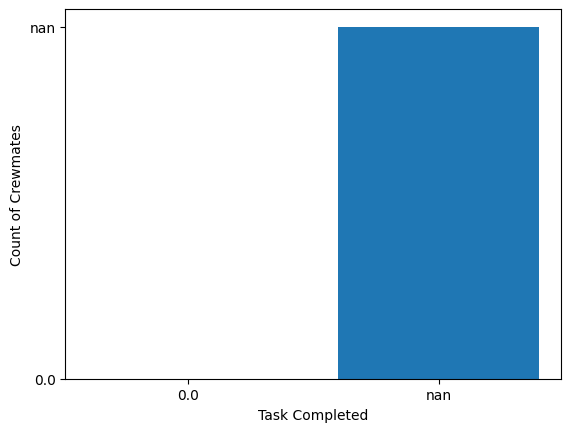

In [ ]:
df["Task Completed"] = 0
df = df.assign(**{"Count of Crewmates": 0})
df = df.append({"Name": "Crewmate", "Game Length": 10, "All Tasks Completed": 5}, ignore_index=True)
df["Count of Crewmates"] = df["Count of Crewmates"].astype(str)
plt.bar(df["Task Completed"].astype(str), df["Count of Crewmates"])
plt.xlabel("Task Completed")
plt.ylabel("Count of Crewmates")
plt.show()

STACK BARCHART - tasks completed, not completed , win or loss

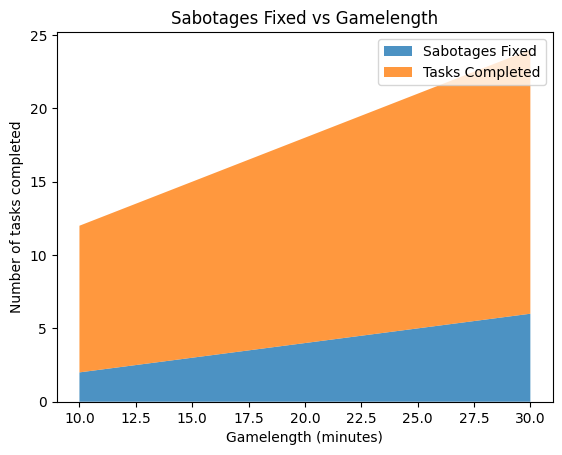

In [ ]:
plt.stackplot(df["Gamelength"], [df["Sabotages Fixed"], df["Tasks Completed"]], labels=["Sabotages Fixed", "Tasks Completed"], alpha=0.8)
plt.xlabel("Gamelength (minutes)")
plt.ylabel("Number of tasks completed")
plt.title("Sabotages Fixed vs Gamelength")
plt.legend()
plt.show()

BIDIRECTION BAR CHART- USERID vs (WIN OR LOSS)

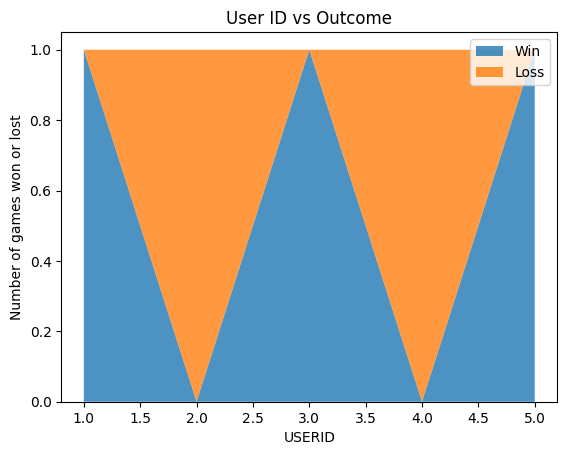

In [ ]:
plt.stackplot(df["USERID"], [df["Outcome"] == "Win", df["Outcome"] == "Loss"], labels=["Win", "Loss"], alpha=0.8)
plt.xlabel("USERID")
plt.ylabel("Number of games won or lost")
plt.title("User ID vs Outcome")
plt.legend()
plt.show()

AREA PLOT- Sabotages Fixed vs gamelength

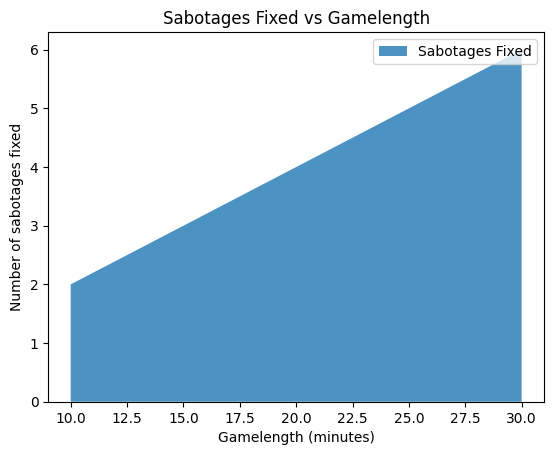

In [ ]:
plt.stackplot(df["Gamelength"], df["Sabotages Fixed"], labels=["Sabotages Fixed"], alpha=0.8)
plt.xlabel("Gamelength (minutes)")
plt.ylabel("Number of sabotages fixed")
plt.title("Sabotages Fixed vs Gamelength")
plt.legend()
plt.show()